In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline
import seaborn as sns
sns.set(style='darkgrid', context='talk', palette='Dark2')
import yfinance as yf

In [4]:
data = yf.download('ETH-USD')
data.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-08-07,2.831620,3.536610,2.521120,2.772120,2.772120,164329
2015-08-08,2.793760,2.798810,0.714725,0.753325,0.753325,674188
2015-08-09,0.706136,0.879810,0.629191,0.701897,0.701897,532170
2015-08-10,0.713989,0.729854,0.636546,0.708448,0.708448,405283
2015-08-11,0.708087,1.131410,0.663235,1.067860,1.067860,1463100


In [7]:
short_rolling = data.rolling(window=20).mean()
short_rolling.head(20)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-08-07,NaN,NaN,NaN,NaN,NaN,NaN
2015-08-08,NaN,NaN,NaN,NaN,NaN,NaN
2015-08-09,NaN,NaN,NaN,NaN,NaN,NaN
2015-08-10,NaN,NaN,NaN,NaN,NaN,NaN
2015-08-11,NaN,NaN,NaN,NaN,NaN,NaN
2015-08-12,NaN,NaN,NaN,NaN,NaN,NaN
2015-08-13,NaN,NaN,NaN,NaN,NaN,NaN
2015-08-14,NaN,NaN,NaN,NaN,NaN,NaN
2015-08-15,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
long_rolling = data.rolling(window=100).mean()
long_rolling.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-09-17,2682.373958,2773.365051,2584.722738,2691.201326,2691.201326,2.213088e+10
2021-09-18,2690.236760,2782.573550,2594.087645,2700.806323,2700.806323,2.200330e+10
2021-09-19,2699.841050,2792.102622,2603.680673,2710.563115,2710.563115,2.189755e+10
2021-09-20,2709.590234,2801.063599,2610.431483,2716.428206,2716.428206,2.191402e+10
2021-09-21,2715.593481,2806.550476,2615.693751,2721.388328,2721.388328,2.190617e+10


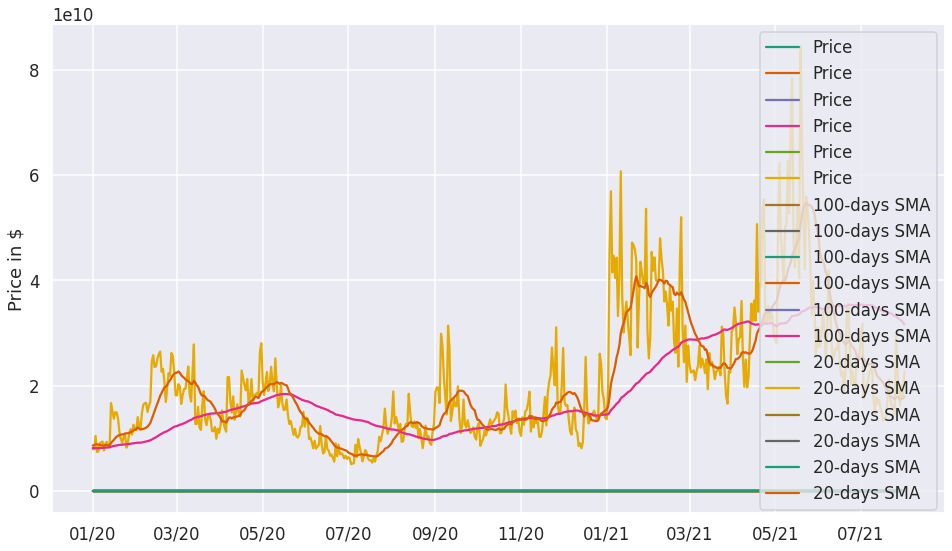

In [14]:
start_date = '2020-01-01'
end_date = '2021-08-01'
my_year_month_fmt = mdates.DateFormatter('%m/%y')
fig, ax = plt.subplots(figsize=(16,9))

ax.plot(data.loc[start_date:end_date, :].index, data.loc[start_date:end_date], label='Price')
ax.plot(long_rolling.loc[start_date:end_date, :].index, long_rolling.loc[start_date:end_date], label = '100-days SMA')
ax.plot(short_rolling.loc[start_date:end_date, :].index, short_rolling.loc[start_date:end_date], label = '20-days SMA')

ax.legend(loc='best')
ax.set_ylabel('Price in $')
ax.xaxis.set_major_formatter(my_year_month_fmt)

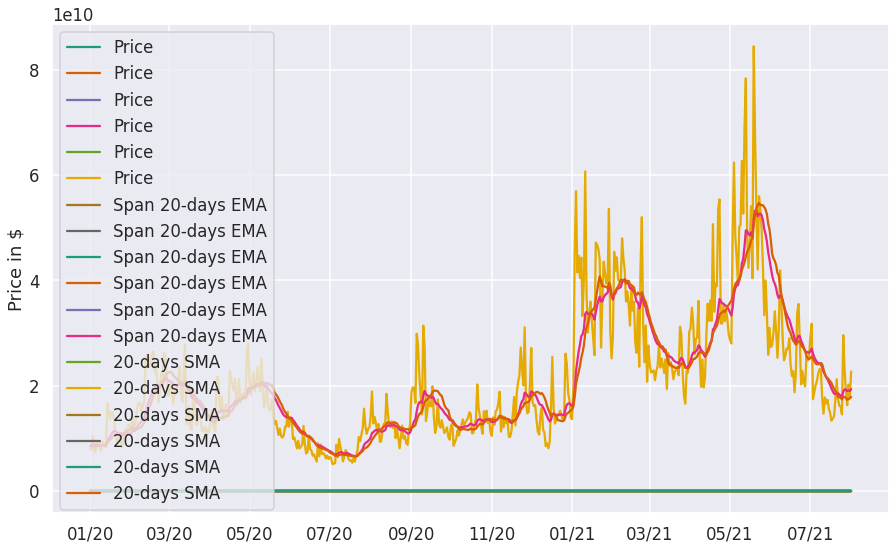

In [19]:
ema_short = data.ewm(span=20, adjust=False).mean()
start_date = '2020-01-01'
end_date = '2021-08-01'
fig, ax = plt.subplots(figsize=(15,9))

ax.plot(data.loc[start_date:end_date, :].index, data.loc[start_date:end_date], label='Price')
ax.plot(ema_short.loc[start_date:end_date, :].index, ema_short.loc[start_date:end_date], label = 'Span 20-days EMA')
ax.plot(short_rolling.loc[start_date:end_date, :].index, short_rolling.loc[start_date:end_date], label = '20-days SMA')

ax.legend(loc='best')
ax.set_ylabel('Price in $')
ax.xaxis.set_major_formatter(my_year_month_fmt)

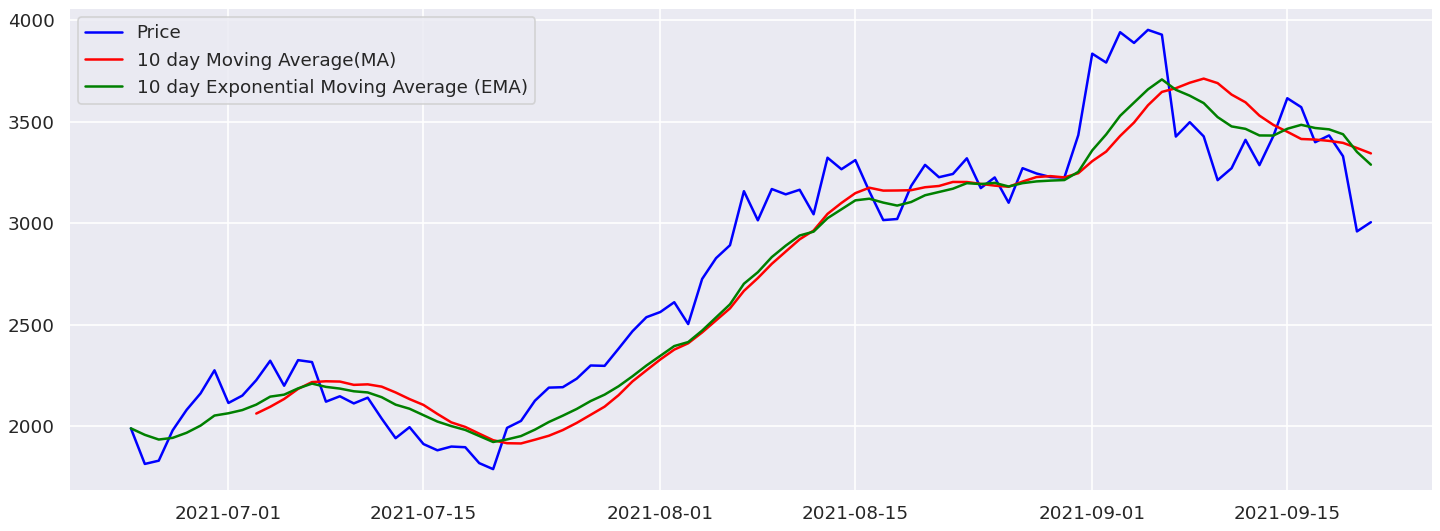

In [30]:
ema10 = data[-90:].Close.ewm(span=10, adjust=False).mean()
ma10 = data[-90:].Close.rolling(10).mean()
price = data[-90:].Close
plt.figure(figsize=(22, 8), dpi=80)
plt.plot(price,color='blue')
plt.plot(ma10,color='red')
plt.plot(ema10,color='green')
plt.legend(['Price','10 day Moving Average(MA)','10 day Exponential Moving Average (EMA)'])

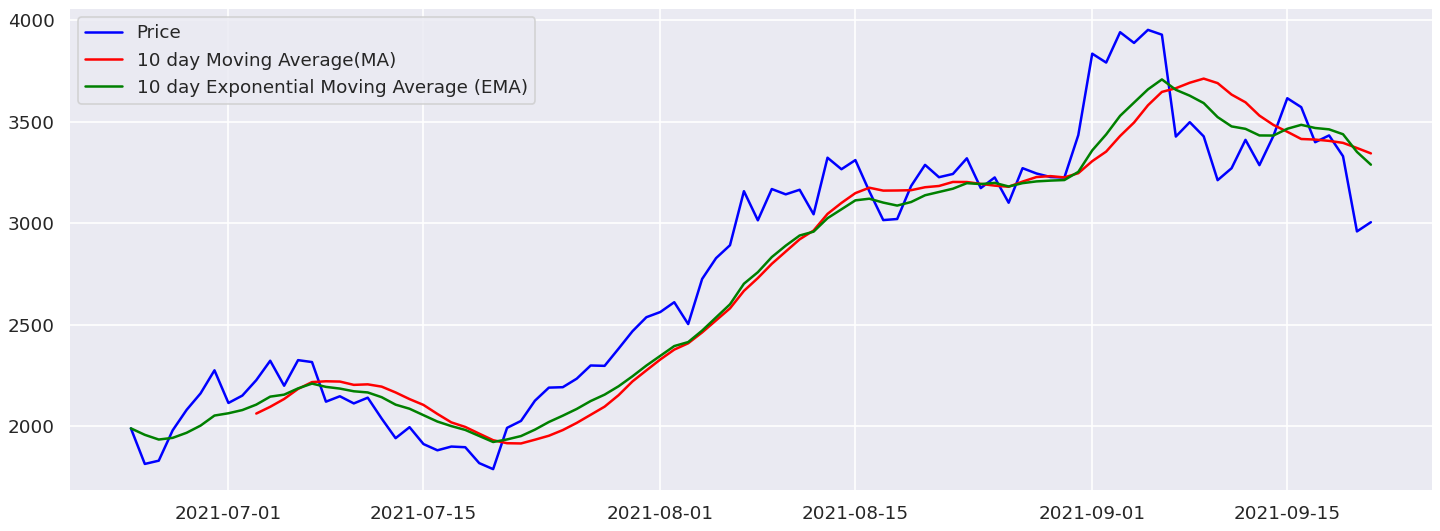

In [31]:
ema100 = data[-90:].Close.ewm(span=100, adjust=False).mean()
ma100 = data[-90:].Close.rolling(100).mean()
price = data[-90:].Close
plt.figure(figsize=(22, 8), dpi=80)
plt.plot(price,color='blue')
plt.plot(ma10,color='red')
plt.plot(ema10,color='green')
plt.legend(['Price','100 day Moving Average(MA)','100 day Exponential Moving Average (EMA)'])